In [63]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#load the dataset
cab_data_df=pd.read_csv('Cab_Data.csv')
customer_data_df = pd.read_csv('Customer_ID.csv')
transaction_data_df = pd.read_csv('Transaction_ID.csv')
city_data_df = pd.read_csv('City.csv')

In [65]:
#print the first few rows of each dataset

In [66]:
print(cab_data_df.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [67]:
print(customer_data_df.head())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [68]:
print(transaction_data_df.head())

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [69]:
print(city_data_df.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [72]:
#check the data of each dataset

In [73]:
print(cab_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


In [74]:
print(customer_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [75]:
print(transaction_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


In [76]:
print(city_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


In [77]:
#Remove duplicates from each dataset
cab_data_df.drop_duplicates(inplace=True)
customer_data_df.drop_duplicates(inplace=True)
transaction_data_df.drop_duplicates(inplace=True)
city_data_df.drop_duplicates(inplace=True)

In [78]:
#merge the dataset

In [79]:
merged = pd.merge(cab_data_df, transaction_data_df, on='Transaction ID', how='left')

In [80]:
merged_data = pd.merge(merged, customer_data_df, on='Customer ID', how='left')

In [81]:
final_merged = pd.merge(merged_data, city_data_df, on='City', how='left')

In [82]:
print(final_merged.head())
print(final_merged.info())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1                9237   814,885    24,

# Hypothesis

### 1. There is seasonality in the number of customers using the cab service.

Does the number of customers increase or decrease during specific months or seasons?

In [83]:
#as the format of "Date of Travel was not in datetime format, convert it"
final_merged['Date'] = pd.TimedeltaIndex(final_merged['Date of Travel'], unit='D') + pd.Timestamp('1899-12-30')

In [84]:
final_merged['Month'] = final_merged['Date'].dt.month
final_merged['Day_of_Week'] = final_merged['Date'].dt.dayofweek

In [85]:
#group the data and count the unique customers
seasonal_data = final_merged.groupby(['Company', 'Month'])['Customer ID'].nunique().unstack('Company')

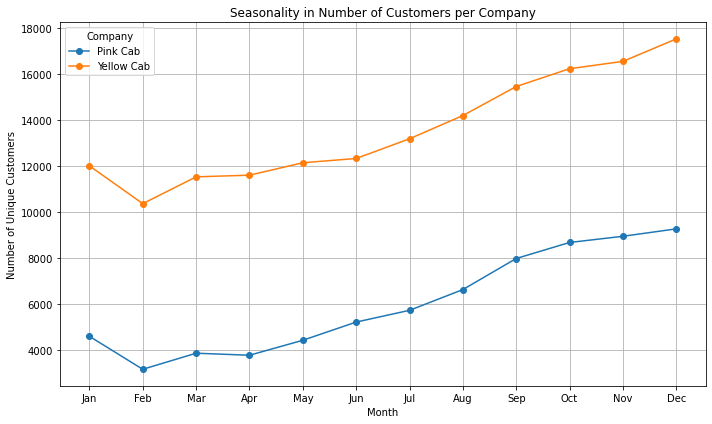

In [86]:
plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Seasonality in Number of Customers per Company')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Company')
plt.grid()
plt.tight_layout()
plt.show()

### 2. Customer demographics impact usage.

Is the age and income of customers influence the frequency of cab usage?

In [87]:
#create age group
age_df = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
final_merged['Age Group'] = pd.cut(final_merged['Age'], bins=age_df, labels=age_labels)

In [88]:
#group the data and count unique customers
age_usage = final_merged.groupby(['Age Group','Company'])['Customer ID'].nunique().unstack('Company')

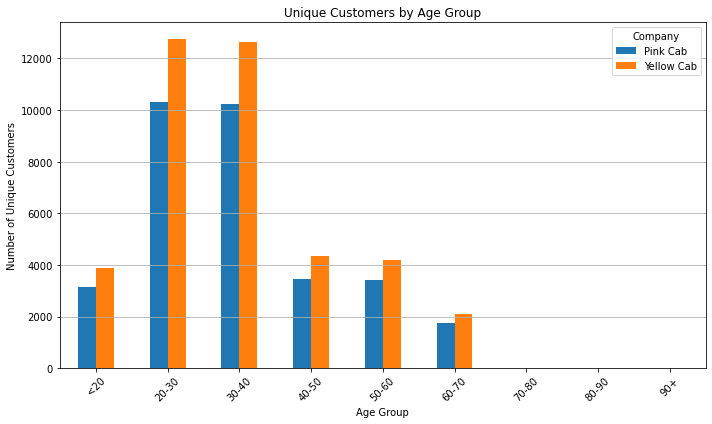

In [89]:
plt.figure(figsize=(10, 6))
age_usage.plot(kind='bar', ax=plt.gca())
plt.title('Unique Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 3. Different payment methods are preffered by different demographic groups

In [90]:
#create crosstabs for future analysis
payment_method_by_age = pd.crosstab([final_merged['Company'],final_merged['Age Group']], final_merged['Payment_Mode'])
payment_method_by_gender = pd.crosstab([final_merged['Company'],final_merged['Gender']], final_merged['Payment_Mode'])

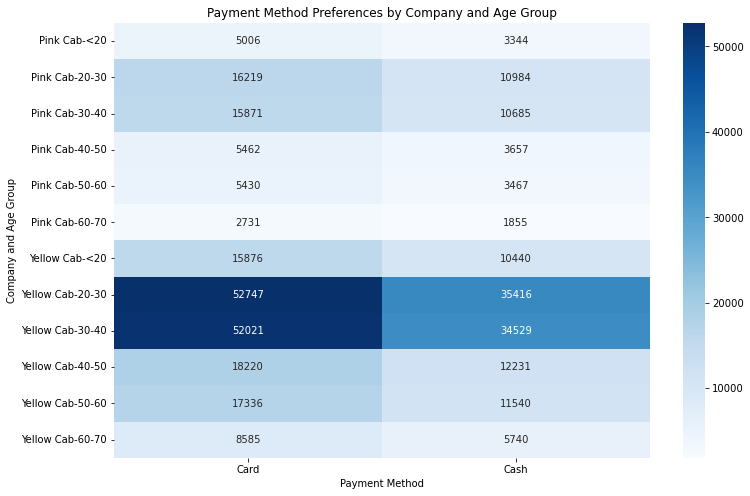

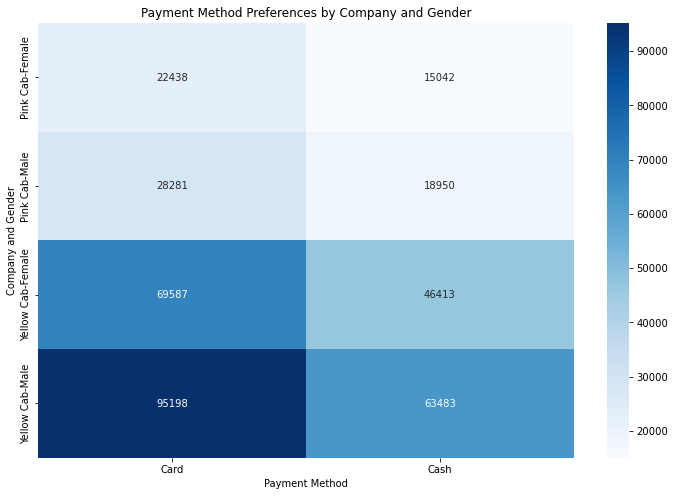

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(payment_method_by_age, annot=True, cmap='Blues', fmt='d')
plt.title('Payment Method Preferences by Company and Age Group')
plt.xlabel('Payment Method')
plt.ylabel('Company and Age Group')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(payment_method_by_gender, annot=True, cmap='Blues', fmt='d')
plt.title('Payment Method Preferences by Company and Gender')
plt.xlabel('Payment Method')
plt.ylabel('Company and Gender')
plt.show()

### 4. There is a positive correlation between the distance traveled and the price charged.

In [91]:
companies = final_merged['Company'].unique()

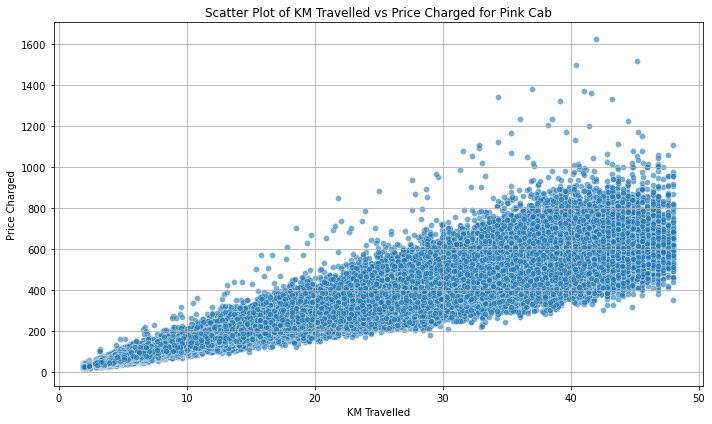

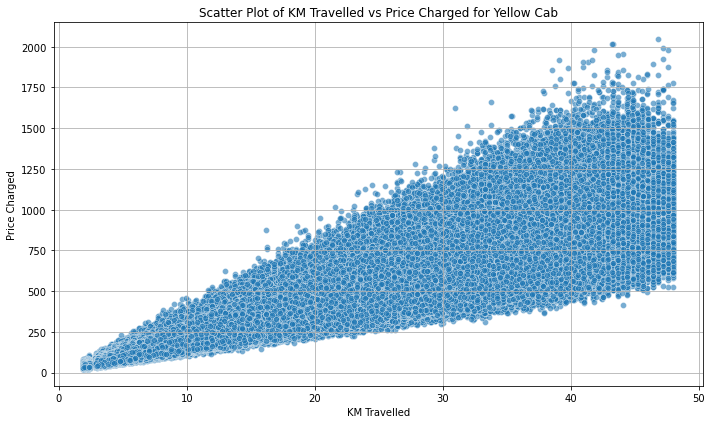

In [92]:
#visualize the relationship
for company in companies:
    company_data = final_merged[final_merged['Company'] == company]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=company_data, x='KM Travelled', y='Price Charged', alpha=0.6)
    plt.title(f'Scatter Plot of KM Travelled vs Price Charged for {company}')
    plt.xlabel('KM Travelled')
    plt.ylabel('Price Charged')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [47]:
#get correlation
for company in companies:
    company_data = final_merged[final_merged['Company'] == company]
    correlation = company_data['KM Travelled'].corr(company_data['Price Charged'])
    print(f'Correlation Coefficient between KM Travelled and Price Charged for {company}: {correlation:.2f}')

Correlation Coefficient between KM Travelled and Price Charged for Pink Cab: 0.93
Correlation Coefficient between KM Travelled and Price Charged for Yellow Cab: 0.86


### 5. One cab company generates higher revenue per customer than the other.

In [54]:
total_revenue = final_merged.groupby('Company')['Price Charged'].sum().reset_index()

In [55]:
unique_customers = final_merged.groupby('Company')['Customer ID'].nunique().reset_index()

In [60]:
revenue_per_customer = pd.merge(total_revenue, unique_customers, on='Company')

In [61]:
revenue_per_customer.columns = ['Company', 'Total Revenue', 'Unique Customers']

In [62]:
#count revenue per customers for each company
revenue_per_customer['Revenue per Customer'] = revenue_per_customer['Total Revenue'] / revenue_per_customer['Unique Customers']
print(revenue_per_customer[['Company', 'Revenue per Customer']])

      Company  Revenue per Customer
0    Pink Cab            814.359769
1  Yellow Cab           3154.549007
